# Checkpoint 3

**Due: Friday, 4 December, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.


# NMR spectrum of water

This problem concerns obtaining the nuclear magnetic resonance (NMR) spectrum of water from a raw NMR signal.

Given: a file containing the free-induction decay signal $y(t)$ (electromagnetic radiation emitted by protons in water), following an RF $\pi$-pulse of f=60MHz. The recorded signal is frequency-subtracted, i.e., the radio-frequency output signal has been mixed with the carrier frequency f=60MHz to shift the signal to lower frequencies in the range of hundreds of Hz.

The signal has three main components: the actual NMR signal from protons in water molecules, white noise, and a 50 Hz "mains hum" (electrical signal picked up by the sensitive NMR detector, coming from the mains AC; the signal also contains higher harmonics).

### Hints on how to solve this checkpoint:
- The code must work (and will be tested on) for other data files, in which the frequency of the water peak may differ by 10%. Any 'fine-tuning' of your algorithms so that they only work for the given data file is therefore discouraged.
- Write the code in a modular way so that you can re-use functions from previous tasks. This will save you a lot of time.
- Do not make the code more complex that it needs to be. Classes, complex data structures etc. are not required for this checkpoint.
- Use NumPy/SciPy functions rather than your own implementation whenever possible.
- As in CP1 and CP2, apart from numerical accuracy, efficiency and coding style will also be marked. Try to make your code readable.
- Comment on the results obtained. This may help to get a better mark if there is a problem with the code.

**There are 6 tasks in this CP worth 100 points, plus a bonus task 7 worth 15 points. The total mark will be the sum of all marks, or 100 points, whichever is lower.**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas
import time
from scipy import integrate, optimize

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

In [3]:
from scipy import stats

# Task 1 (15p)

Load the data from the file "signals/water_16_samples.csv" and make a plot of the recorded signal versus time for t=[0,0.05), for the first of the 16 samples. Label the axes.

Each row of the data file (except the first which contains table headings) has the following format:

time, s1, s2, s3, ...

where "time" is in seconds, and s1,s2,s3,... represent the NMR signal (arbitrary units) from independent realisations of the experiment. Differences between the samples should be only due to noise; it is the same experiment repeated 16  times.

(0.0, 0.05)

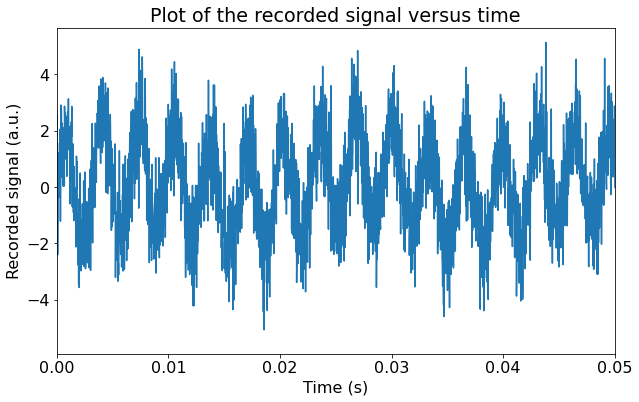

In [4]:
data1 = pandas.read_csv(r"signals/water_16_samples.csv") # Imports the data from the .csv file
plt.plot(data1['t'], data1['s1']) # Plot s1
plt.xlabel('Time (s)')
plt.ylabel('Recorded signal (a.u.)')
plt.title('Plot of the recorded signal versus time')
plt.xlim((0, 0.05)) # Limits to the the range t=[0, 0.05)

# Task 2 (15p)

Calculate the amplitude spectrum of the NMR signal, and plot it as a function of frequency f [Hertz], for f=0 to 500 Hz. Assume the length of the time series is tmax=0.5s.

**Note: in workshop, you have been plotting wavenumber ($k = \frac{2\pi}{\lambda}$), whereas frequency is $f = \frac{1}{\lambda}$.**

(0.0, 500.0)

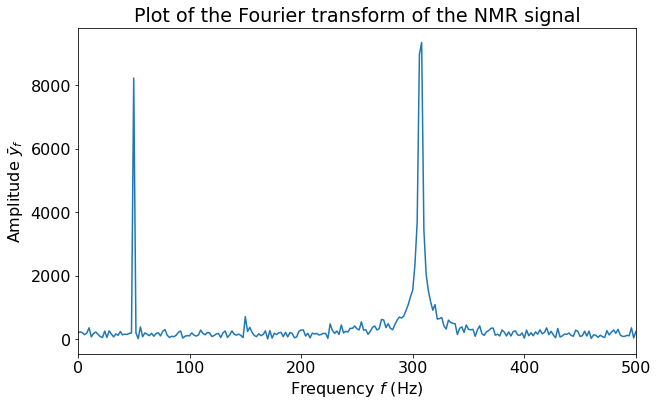

In [5]:
tmax = 0.5

amplitude_spectrum = np.fft.rfft(data1['s1']) # Fourier transform of the NMR signal
nn = amplitude_spectrum.size
freq = np.linspace(0, (nn-1)/tmax, nn) # Creates the frequencies that the amp spectrum corresponds to
plt.plot(freq, np.abs(amplitude_spectrum))
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('Amplitude $\\bar{y}_{f}$')
plt.title('Plot of the Fourier transform of the NMR signal')
plt.xlim((0, 500)) # Limits f to 0, 500 Hz

# Task 3 (15p)

Filter out the noise by passing the signal through a bandpass filter centered at the water peak with a width $\pm$30 Hz. Plot the filtered signal y(t) for t=[0,0.5).

Text(0.5, 1.0, 'Plot of the signal cleaned by a bandpass filter versus time')

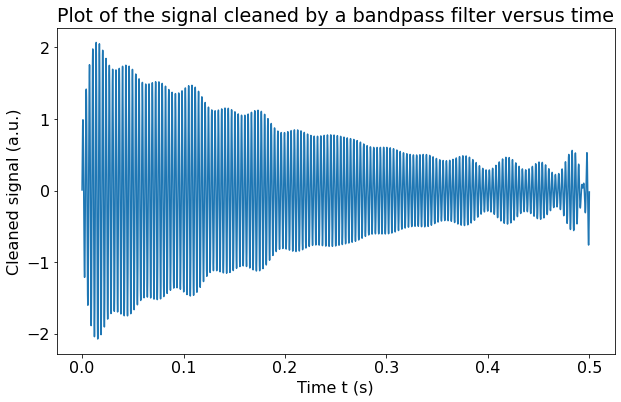

In [6]:
imaxf = np.abs(amplitude_spectrum).argmax() # Index of peak of the signal, making sure that we are taking the absolute value
                                            # because the peak we see may also be mostly complex, like in dataset 2
amplitude_spectrum[:][np.abs(freq - freq[imaxf]) > 30] = 0 # Filters the amplitude spectrum

clean_signal = np.fft.irfft(amplitude_spectrum) # Inverse fourier transform of the cleaned amplitude spectrum

plt.plot(data1['t'], clean_signal)
plt.xlabel('Time t (s)')
plt.ylabel('Cleaned signal (a.u.)')
#plt.xlim((0, 0.5)) optional, kind of makes it uglier since the data is from 0 to 0.5 anyways
plt.title('Plot of the signal cleaned by a bandpass filter versus time')

# Task 4 (15p)

Use non-linear curve fitting to fit the function:

$
\Large
\begin{align}
y_{\rm theor}(t) = A \sin(2\pi f_0 t) e^{-t/t_0}
\end{align}
$

to the filtered signal for t=[0,tmax), with unknown parameters $A, f_0, t_0$. Find and print out the best-fit frequency $f_0$. The frequency should be accurate to within 0.01 Hz of the correct answer.

In [7]:
def y_theor_model(t, A, f_0, t_0):
    """
    Model function to fit the data
    
    Parameters
    ----------
    t : array
        Contains the values of time at which the function is being evaluated
    A, f_0, t_0 : floats
        Parameters controlling the behaviour of the function
    Returns
    -------
    y_theor : array
        Contains the evaluation of the function in the above cell
    """
    y_theor = A * np.sin(2*np.pi*f_0*t) * np.exp(-t/t_0)
    return y_theor

freq_guess = freq[imaxf] # Here we guess f_0 by assuming it will be close to the absolute peak of the amplitude spectrum
pars4, cov4 = optimize.curve_fit(y_theor_model, data1['t'], clean_signal, p0 = [1, freq_guess, 1]) # Curve fit here
# Guesses of 1 for A and t_0 are just arbitrary

In [8]:
print(f"Best-fit frequency f_0: {pars4[1]} Hz")

Best-fit frequency f_0: 307.0271023895698 Hz


In [9]:
print ("There will be tests here. Great job so far!")

There will be tests here. Great job so far!


# Task 5 (15p)

Determine $f_0$ in a different way: find the position of the water peak in the amplitude spectrum by fitting the curve

$
\large
\begin{align}
\tilde{y}_{\rm theor}(f) = C + \frac{A}{\sqrt{\lambda^4 + (f^2 - f_0^2)^2 + 2 \lambda^2(f^2 + f_0^2))}}
\end{align}
$

This curve comes from Fourier-transforming the exponentially damped sine function from the previous task, plus a constant C to account for background noise. $\lambda$ denotes the damping rate (inversely proportional to $t_0$ from task 4).

As before, use only the first of the 16 samples for this task. The frequency should be accurate to within 0.01 Hz of the correct answer.

In [10]:
def y_theor_squig(f, C, A, f_0, lam):
    """
    Model function to fit the data
    
    Parameters
    ----------
    f : array
        Contains the values of frequency at which the function is being evaluated
    C, A, f_0, lam : floats
        Parameters controlling the behaviour of the function
    Returns
    -------
    y_theor : array
        Contains the evaluation of the function in the above cell
    """
    y_theor = C + A * (lam**4 + (f**2-f_0**2)**2 + 2 * lam**2 * (f**2 + f_0**2))**(-0.5)
    return y_theor

amp_spec_dirty = np.fft.rfft(data1['s1']) # Recalculating the initial amplitude spectrum. Can be used later.
    
def task5(amp_spec, filtered):
    if filtered == True:
        amp_spec[:][np.abs(freq - freq[imaxf]) > 30] = 0 # Filters the amplitude spectrum, just in case it hasn't been
                                                         # Yes, I could check whether it has already been filtered but that
                                                         # would take more code and would reduce the readability
            
        pars5, cov5 = optimize.curve_fit( # Curve fits with filtered data
            y_theor_squig,
            freq,
            np.abs(amp_spec),
            p0 = [1, 500000, freq_guess, 1])
            
    if filtered == False:
        pars5, cov5 =  optimize.curve_fit( # Curve fits with unfiltered data
            y_theor_squig,
            freq, 
            np.abs(amp_spec), # the absolute value is fitted because the model can only output real values
            p0 = [1, 500000, freq_guess, 1])# The initial guess for A was chosen by trial and error, which is why
                                      # it is so high lower values led to a lack of convergence.
        
    return pars5, cov5

pars5, cov5 = task5(amp_spec_dirty, filtered = False)


    

In [11]:
print(f"Best-fit frequency f_0: {pars5[2]} Hz")

Best-fit frequency f_0: 307.0227812425918 Hz


In [12]:
print ("Tests here. Keep it up!")

Tests here. Keep it up!


# Task 6 (10p)

Determine the frequency $f_0$ for all 16 data sets using the method from Task 5. Calculate mean $f_0$ and its standard error. The frequency should be accurate to within 0.01 Hz of the correct answer and the standard error should be within 1%.

In [13]:
def task6(filtered):
    """
    Function for task 6
    
    Parameters
    ----------
    filtered : boolean
        If true, use filtered data
        If false, use unfiltered data
    """
    series = list(data1)[1:] # Exclude the first column, time
    f_0s = []
    sigmas = []
    
    for s in series:
        amp_spec = np.fft.rfft(data1[s])
        pars6, cov6 = task5(amp_spec, filtered) # Reuses the function from task 5 to find the optimal parameters and covs
        
        f_0s.append(pars6[2])
        
        sigma_f = cov6[2,2] # selects the covariance of f_0 with itself, i.e. its variance
        sigmas.append(sigma_f)
        
    f_0 = np.mean(f_0s) # Mean of f_0 found in each of the series
    standard_error_1 = 1/len(series) * np.sqrt(np.sum(sigmas)) # First formula, using the covariances in the fit, see below
    standard_error_2 = stats.sem(f_0s) # Built in 
    
    if filtered == True:
        print("Using filtered data:")
    else:
        print("Using unfiltered data: ")
    print(f"Mean f_0: {f_0}")
    print(f"Standard error, method 1: {standard_error_1}, method 2: {standard_error_2}")

From the statistics course, method 1:
$$\sigma_{\mu}^2 = \Sigma \frac{\mu_i}{N}$$
$$\sigma_{\mu} = \frac{1}{N}\sqrt{\Sigma\mu_i}$$
If it is necessary to choose between one of them, then I would choose the one fitted to unfiltered data.

In [14]:
task6(False)
task6(True)

Using unfiltered data: 
Mean f_0: 307.0203956354976
Standard error, method 1: 0.0023273733059561083, method 2: 0.0026739215771967523
Using filtered data:
Mean f_0: 307.02150815707824
Standard error, method 1: 0.00037791991996686934, method 2: 0.0027417702141415627


In [15]:
print ("Tests here. Almost there!")

Tests here. Almost there!


# Bonus: Task 7 (15p)

Find the 95% equally-tailed credible interval of $f_0$ from task 5 using Bayesian inference.

Use only the first of the 16 samples for this task. Assume the spectrum can be modelled by the curve from task 5, with $C=0$ and random noise superimposed on the curve. The noise should be generated as independent, identically distributed random numbers $\{\chi_k\}$ drawn from the Chi distribution with two degrees of freedom and unknown amplitude $\sigma$, so that the amplitude spectrum is

$
\large
\begin{align}
\tilde{y}_k = \frac{A}{\sqrt{\lambda^4 + (f_k^2 - f_0^2)^2 + 2\lambda^2(f_k^2 + f_0^2))}} + \sigma \chi_k
\end{align}
$

where $f_k = k/t_{max}$. The rationale for using the Chi distribution comes from Fourier-transforming Gaussian noise and taking its modulus (to plot the amplitude spectrum).

Does the average value of $f_0$ obtained in task 6 lie in the credible interval? The bounds of the interval should be accurate to within 0.01 Hz of the correct answer.

In [16]:
def y_squig_7(f_k, A, f_0, lam, amp):
    """
    Model function to fit the data
    
    Parameters
    ----------
    f_k : array
        Contains the values of time at which the function is being evaluated
    A, f_0, lam, amp : floats
        Parameters controlling the behaviour of the function
    Returns
    -------
    y_theor : array
        Contains the evaluation of the function in the above cell
    """
    y_theor = A * (lam**4 + (f_k**2 - f_0**2)**2 + 2 * lam**2 * (f_k**2 + f_0**2))**(-0.5) + \
        np.sqrt(np.random.chisquare(2, len(f_k))) * amp
    return y_theor
                                                                        
def distance(y1, y2):
    """
    Distance function used in Approximate Bayesian computation
    
    Parameters
    ----------
    y1, y1 : array
        Contains position data
    Returns
    -------
    dist : float
        Sum of the distances between each pair of points in y1, y2
    """
    dist = ((y1 - y2)**2).sum()  
    return dist

In [17]:
def ABC(nreps, epsilon, ranges, model_func, dist_func, data_x, data_y): #Copied straight from the workshop
                                                            #Only difference is that the data is no longer a global variable
    """
    Perfrom Approximate Bayesian computation.
    
    Parameters
    ----------
    nreps : int
        The number of trials.
    epsilon : float
        The maximum distance for a model to be accepted.
    ranges : list of lists of floats
        A list of min, max values for each model parameter.
    model_func : function
        Model function.
    dist_func : function
        Distance function.
    data : data to which the model is being compared
        
    Returns
    -------
    selected : array
        Parameters of the accepted models.
    """
    
    selected = []
    
    for i in range(nreps):
        # Create random parameters for each of the provided ranges.
        pars = [np.random.uniform(*r) for r in ranges]

        # Compute the distance between the model and the data.
        dist = dist_func(np.abs(data_y), model_func(data_x, *pars))

        # Keep the parameters if the model is accepted.
        if dist < epsilon:
            selected.append(pars)
            

    print(f"Epsilon: {epsilon}, accepted sets: {len(selected)} ({100*len(selected)/nreps}%).")
    return np.array(selected)

In [18]:
# This particular process only runs well with dataset 1 since the epsilon values need to be configured manually.
# If you want to see my attempt to automate finding the right values, check two cells below.
# This includes a couple plots of epsilon values to showcase my attempts at finding the right epsilon.
# The ranges were also tightened as much as possible while still keeping a certain margin below and above f+ and f-
# The goal here was to have 1% of the values accepted.

eps_vals = np.linspace(7e7, 8e7, 11)
n_trials = 10000

acceptance = []
stddev = []

range_multiplier = 0.0025 # We assume that A, lambda and f_0 have the same initial posterior distribution
ranges = [[pars5[1]*(1+range_multiplier), pars5[1]*(1-range_multiplier)], # Taking the parameters from 5
          [pars5[2]*(1+range_multiplier), pars5[2]*(1-range_multiplier)],
          [pars5[3]*(1+range_multiplier), pars5[3]*(1-range_multiplier)],
          [0, 300]] # This is a guess at the noise
print(ranges) # Just so you can see what the range of the values we're trying here look like
              # I was hesitant to make range_multiplier much smaller as it would have started getting really close to 


def plot_range(eps_vals):
    """
    
    """
    acceptance = []
    for my_eps in eps_vals:
        sel = ABC(n_trials, my_eps, ranges, y_squig_7, distance, freq[:500], amp_spec_dirty[:500]) # We use
        # these items because we don't really need to fit it over every single point if it's just noise.
        # Also, it speeds it up significantly.
        acceptance.append(100*len(sel)/n_trials)
        
    plt.plot(eps_vals, acceptance)
    plt.xlabel('Epsilon')
    plt.ylabel('Percentage acceptance rate')
    plt.title('')
# find epsilon which results in approx 1% of values

[[5995250.096319443, 5965348.599579696], [307.79033819569827, 306.25522428948534], [0.41050153561507463, 0.408454146410012], [0, 300]]


Epsilon: 1.0, accepted sets: 0 (0.0%).
Epsilon: 10.0, accepted sets: 0 (0.0%).
Epsilon: 100.0, accepted sets: 0 (0.0%).
Epsilon: 1000.0, accepted sets: 0 (0.0%).
Epsilon: 10000.0, accepted sets: 0 (0.0%).
Epsilon: 100000.0, accepted sets: 0 (0.0%).
Epsilon: 1000000.0, accepted sets: 0 (0.0%).
Epsilon: 10000000.0, accepted sets: 0 (0.0%).
Epsilon: 100000000.0, accepted sets: 4061 (40.61%).
Epsilon: 1000000000.0, accepted sets: 10000 (100.0%).
Epsilon: 10000000000.0, accepted sets: 10000 (100.0%).


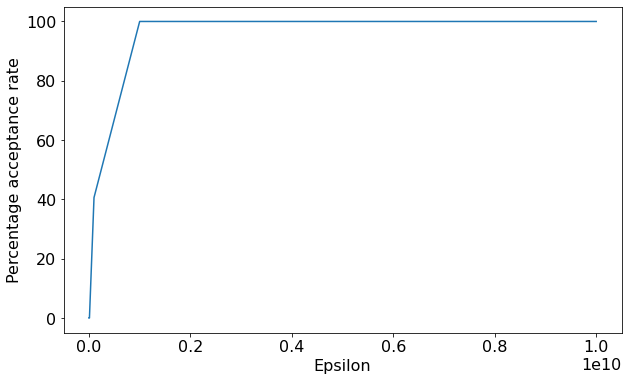

In [19]:
plot_range(np.logspace(0, 10, 11)) # Find out what magnitude we're looking at here

Epsilon: 70000000.0, accepted sets: 11 (0.11%).
Epsilon: 71000000.0, accepted sets: 53 (0.53%).
Epsilon: 72000000.0, accepted sets: 201 (2.01%).
Epsilon: 73000000.0, accepted sets: 359 (3.59%).
Epsilon: 74000000.0, accepted sets: 551 (5.51%).
Epsilon: 75000000.0, accepted sets: 726 (7.26%).
Epsilon: 76000000.0, accepted sets: 965 (9.65%).
Epsilon: 77000000.0, accepted sets: 1075 (10.75%).
Epsilon: 78000000.0, accepted sets: 1334 (13.34%).
Epsilon: 79000000.0, accepted sets: 1484 (14.84%).
Epsilon: 80000000.0, accepted sets: 1678 (16.78%).


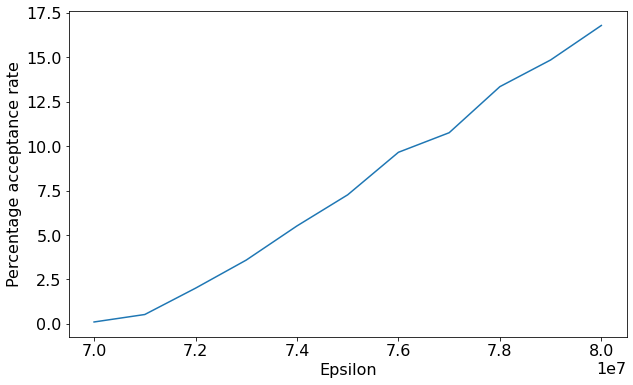

In [20]:
plot_range(np.linspace(7e7, 8e7, 11)) # Refine estimate of epsilon

In [21]:
# Final result here
n_trials = int(1e5)
sel = ABC(n_trials, 7.15e7, ranges, y_squig_7, distance, freq[:500], amp_spec_dirty[:500])

data = sel[:,1]
data = np.sort(data)
print(f"Mean of f_0: {np.mean(data)}")
print(f"(f-, f+) = {data[len(data)//40]}, {data[-len(data)//40]}.")

Epsilon: 71500000.0, accepted sets: 1057 (1.057%).
Mean of f_0: 307.02209266386984
(f-, f+) = 306.9156458652863, 307.1288377123473.


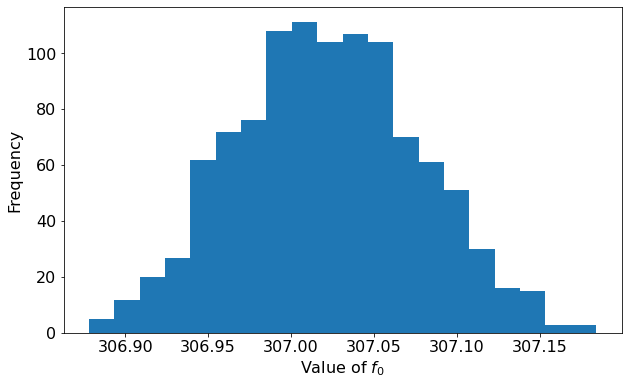

In [22]:
hist, bins = np.histogram(data, bins = 20) # Plot a histogram of accepted values of f_0
plt.hist(data, bins = bins)
plt.xlabel('Value of $f_0$')
plt.ylabel('Frequency')
plt.show()

In [23]:
# This is a draft which I did likely not finish. It would have likely worked if I had finished the find_eps function.

def find_ranges(Arange, frange, lamrange):
    """
    From a range for A, f_0, and lambda, it finds a new range by taking the maximum element of the resulting distribution
    Parameters
    ----------
    Arange, frange, lamrange : list
        First element is the minimum element
        Second element is the maximum element
    """
    ranges = [Arange, frange, lamrange,
              [0, 300]]
    eps = find_eps(ranges, [0, 2.5e8]) 
    sel = ABC(10000, eps, ranges, y_squig_7, distance, freq[100:300], amp_spec_dirty[100:300])
    As = np.sort(sel[:,0])
    fs = np.sort(sel[:,1])
    ls = np.sort(sel[:,2])
    nArange = [As[len(As)//40], As[-len(As)//40]] # Calculate the new range for A, based on 95th percentiles
    nfrange = [fs[len(As)//40], fs[-len(As)//40]]# Calculate the new range for f
    nlamrange = [ls[len(As)//40], ls[-len(As)//40]] # Calculate the new range for lam
    return [nArange, nfrange, nlamrange]

def find_eps(ranges, eps_range):
    """
    This is a method to find the optimal epsilon based on a simple bifurcation method
    """
    accepted_rate = 0
    n_iter = 0
    while (accepted_rate > 0.011 or accepted_rate < 0.009) and n_iter < 10:
        test_eps = np.mean(eps_range)
        sel = ABC(10000, test_eps, ranges, y_squig_7, distance, freq[100:300], amp_spec_dirty[100:300])
        accepted_rate = len(sel)/n_trials
        if accepted_rate < 0.0095:
            eps_range[0] = test_eps
        else:
            eps_range[1] = test_eps
        n_iter += 1
    
    return test_eps

def task7_v2():
    """
    From an initial guess, takes the ranges obtained by find_ranges as a posterior distribution for the next iteration
    until the ranges are the same (to a certain degree of accuracy) after which it is assumed that the ideal posterior
    distribution has been reached.
    """
    n_trials = 10000
    Arange = [pars5[1]*0.99, pars5[1]*1.01]
    frange = [pars5[2]*0.99, pars5[2]*1.01]
    lamrange = [pars5[3]*0.99, pars5[1]*1.01]
    ranges = [Arange, frange, lamrange]
    newranges = find_ranges(*ranges)
    accuracy = 0.005
    while np.abs(ranges[1][0] - newranges[1][0]) > accuracy:
        print(np.abs(np.array(ranges) - np.array(newranges)))
        ranges = newranges
        newranges = find_ranges(*ranges)
        print(newranges)
    
    return ranges
    
n_trials = 10000
        

In [24]:
#task7_v2() # This may take a while to run because for some reason the values of the ranges change quite slowly, which they
           # shouldn't.
           # Also gives the wrong result for some reason that I can't bother to debug at this point
           # I hope that the previous version and the attempt made with this one are good enough
"""
UNCOMMENT THE FUNCTION IF YOU HAVE 5 MINUTES TO WASTE
"""

'\nUNCOMMENT THE FUNCTION IF YOU HAVE 5 MINUTES TO WASTE\n'

In [25]:
print ("Tests. Nice work!")

Tests. Nice work!
